---------------------------
------------------------------
<font size=8 color=darkgreen> Blinkit Sales and Outlet Performance Analysis</font>

---------------------
--------------------


<font size=5 color=orange> TechNest Task 7

--------------

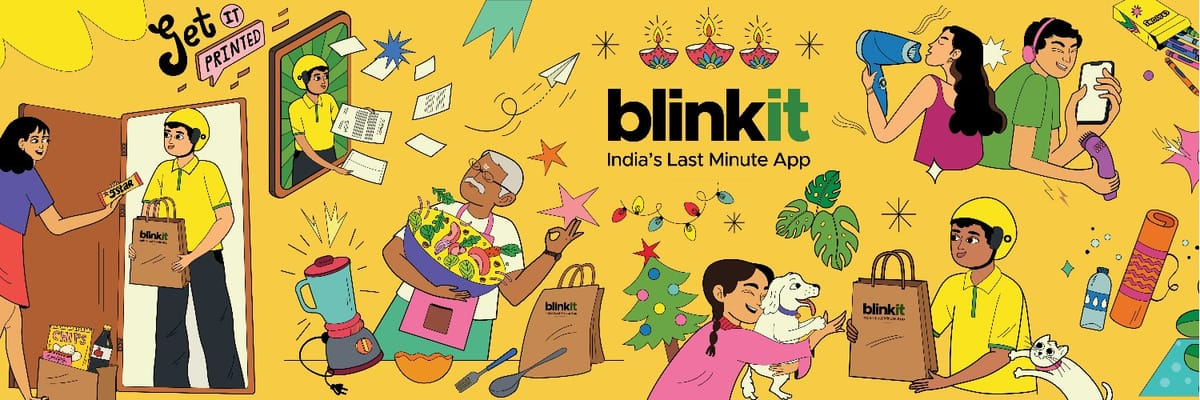

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv('/content/blinkit_data.csv')
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [3]:
print(f'Shape of the dataset: {df.shape}')
print(f'Row Labels\t\t: {df.index}')
print(f'\nColumn Labels:\n {df.columns}')
print(f'\n Data Types:\n {df.dtypes}')

Shape of the dataset: (8523, 12)
Row Labels		: RangeIndex(start=0, stop=8523, step=1)

Column Labels:
 Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

 Data Types:
 Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


><font color=peru> Detecting Missing Values

In [6]:
#Returns True/False value for each Columns
df.isnull()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,True,False,False
8519,False,False,False,False,False,False,False,False,False,True,False,False
8520,False,False,False,False,False,False,False,False,False,True,False,False
8521,False,False,False,False,False,False,False,False,False,True,False,False


In [7]:
#Column-wise Sum
df.isna().sum(axis=0)

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [8]:
#Calculating the percentage of Missing values
missing = (df.isna().sum()/df.shape[0]*100).round(2)
print(f'Percentage of Missing Values:\n {missing}')

Percentage of Missing Values:
 Item Fat Content              0.00
Item Identifier               0.00
Item Type                     0.00
Outlet Establishment Year     0.00
Outlet Identifier             0.00
Outlet Location Type          0.00
Outlet Size                   0.00
Outlet Type                   0.00
Item Visibility               0.00
Item Weight                  17.17
Sales                         0.00
Rating                        0.00
dtype: float64


><font color=peru> Handling Missing Values

In [9]:
# Impute missing values in 'Item Weight' with the mean
df['Item Weight'].fillna(df['Item Weight'].mean(), inplace=True)

# Verify that there are no more missing values in 'Item Weight'
print(df.isna().sum())

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64


/tmp/ipython-input-1298851624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item Weight'].fillna(df['Item Weight'].mean(), inplace=True)


<font size=6 color=blackpink> EDA

----------
Univariante Analysis

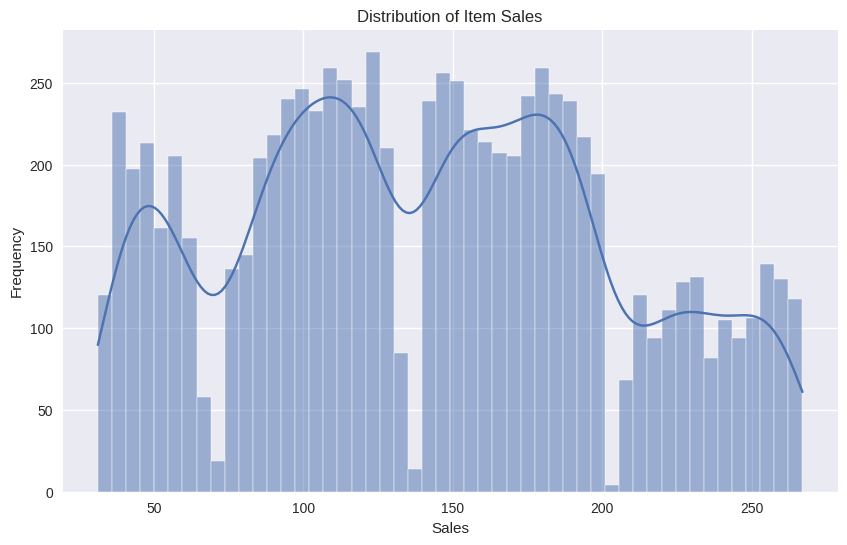

In [13]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Item Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

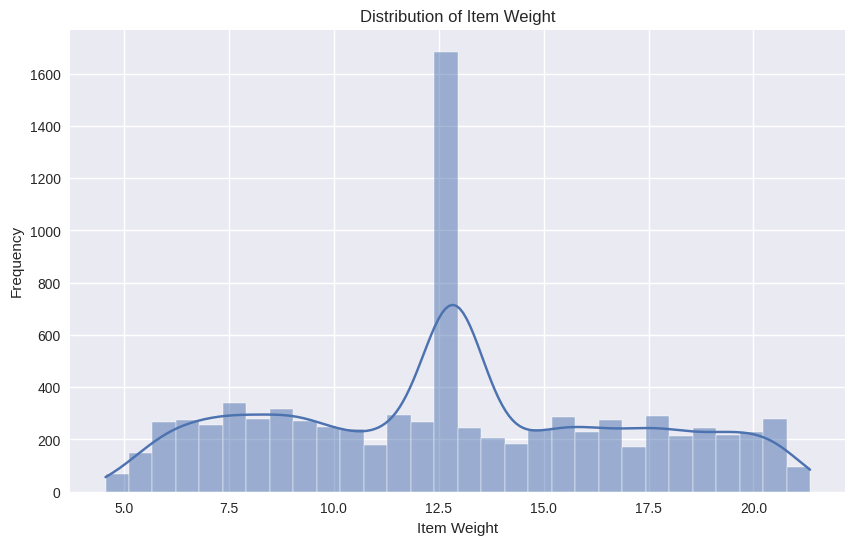

In [14]:
# Distribution of Item Weight
plt.figure(figsize=(10, 6))
sns.histplot(df['Item Weight'], bins=30, kde=True)
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

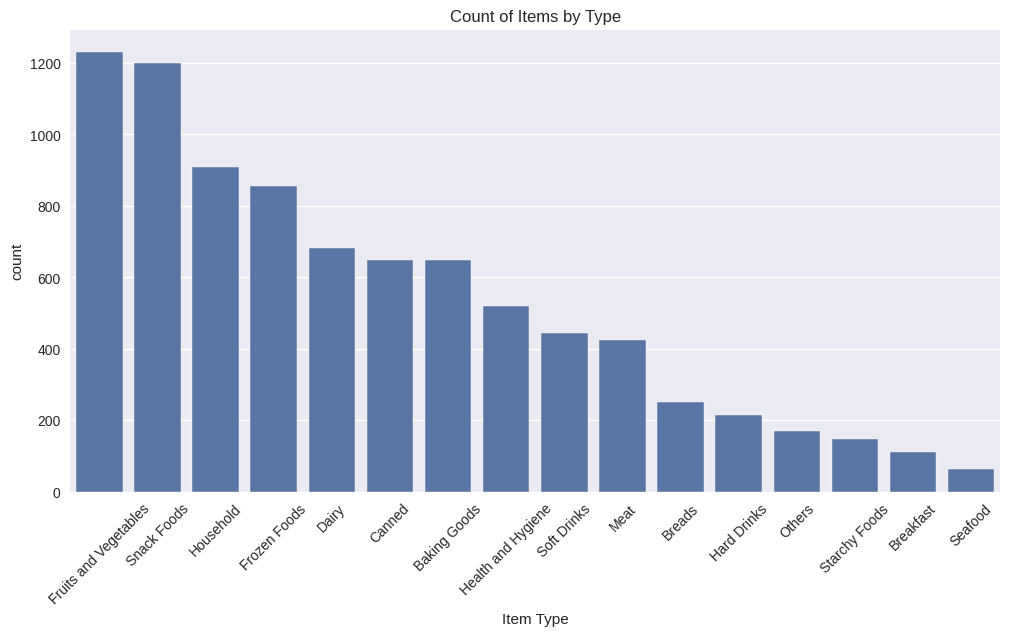

In [15]:
# Count of Item Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Item Type', order=df['Item Type'].value_counts().index)
plt.title('Count of Items by Type')
plt.xticks(rotation=45)
plt.show()

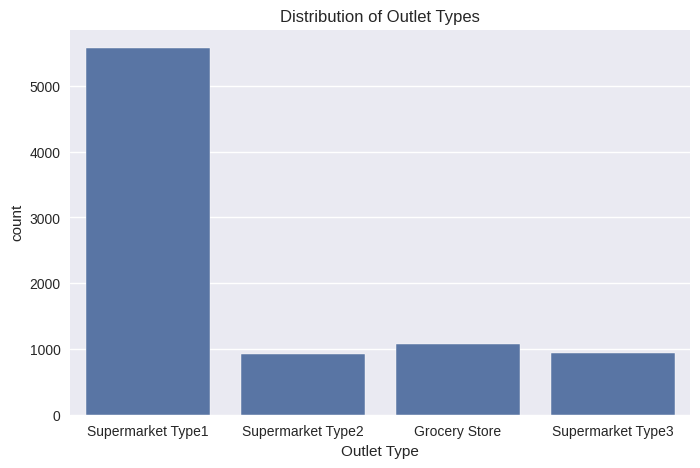

In [16]:
# Outlet Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Outlet Type')
plt.title('Distribution of Outlet Types')
plt.show()

EDA - Bivariate Analysis

-----------------

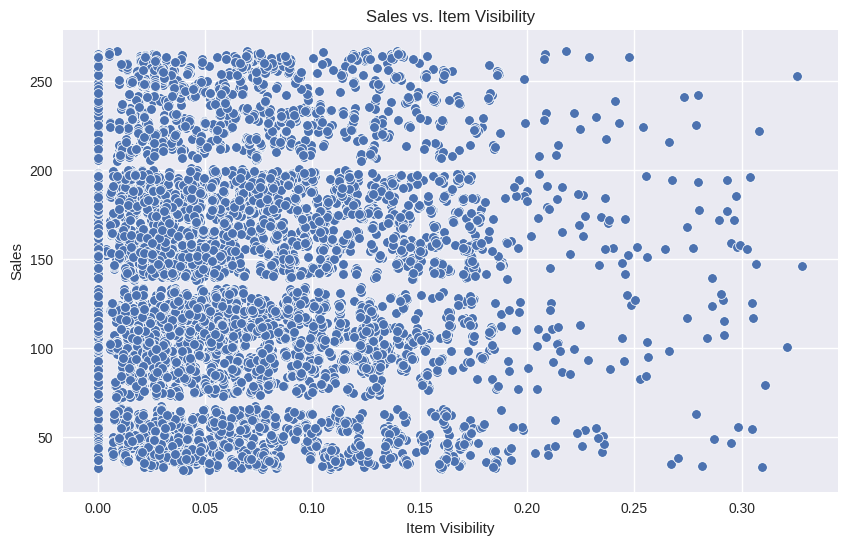

In [17]:
# Sales vs. Item Visibility
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Item Visibility', y='Sales')
plt.title('Sales vs. Item Visibility')
plt.show()

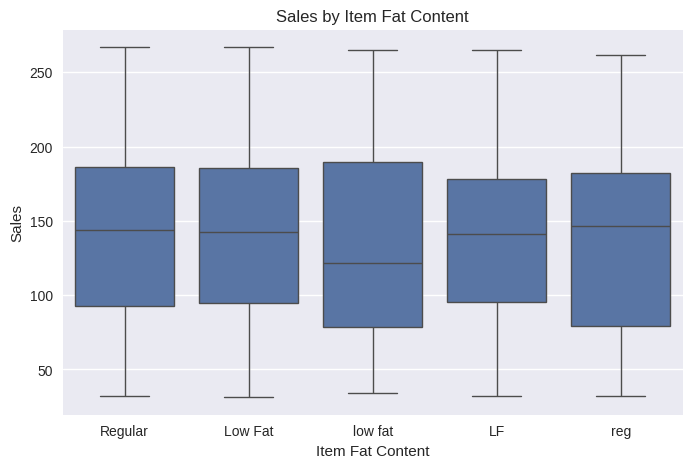

In [18]:
# Sales by Item Fat Content
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Item Fat Content', y='Sales')
plt.title('Sales by Item Fat Content')
plt.show()

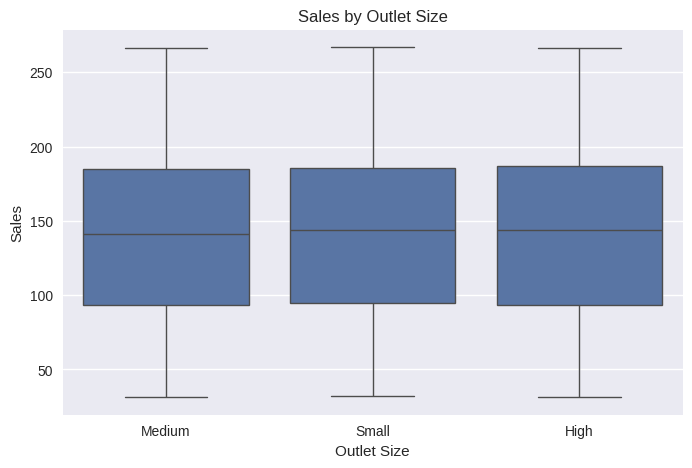

In [19]:
# Sales by Outlet Size
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outlet Size', y='Sales')
plt.title('Sales by Outlet Size')
plt.show()

In [20]:
# Correlation Heatmap (numerical columns)
numerical_cols = ['Item Visibility', 'Item Weight', 'Sales', 'Rating', 'Outlet Age']
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

KeyError: "['Outlet Age'] not in index"

<Figure size 1000x800 with 0 Axes>

# Item Sales Analysis

----------------

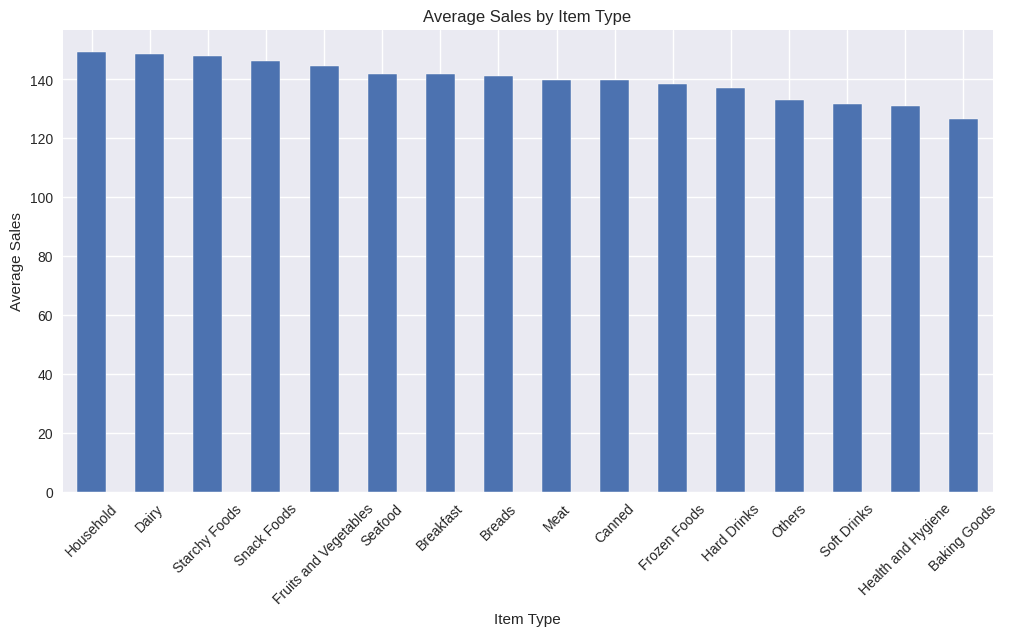

In [21]:
# Average Sales by Item Type
avg_sales_by_type = df.groupby('Item Type')['Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_sales_by_type.plot(kind='bar')
plt.title('Average Sales by Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

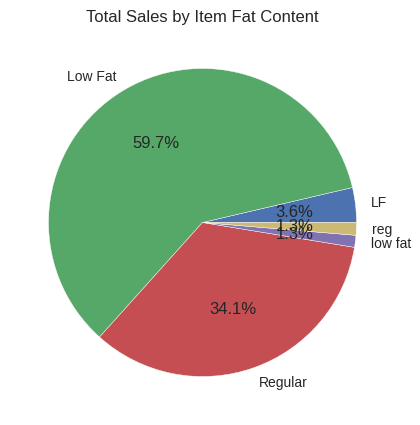

In [22]:
# Total Sales by Item Fat Content
total_sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.figure(figsize=(8, 5))
total_sales_by_fat.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Sales by Item Fat Content')
plt.ylabel('')
plt.show()

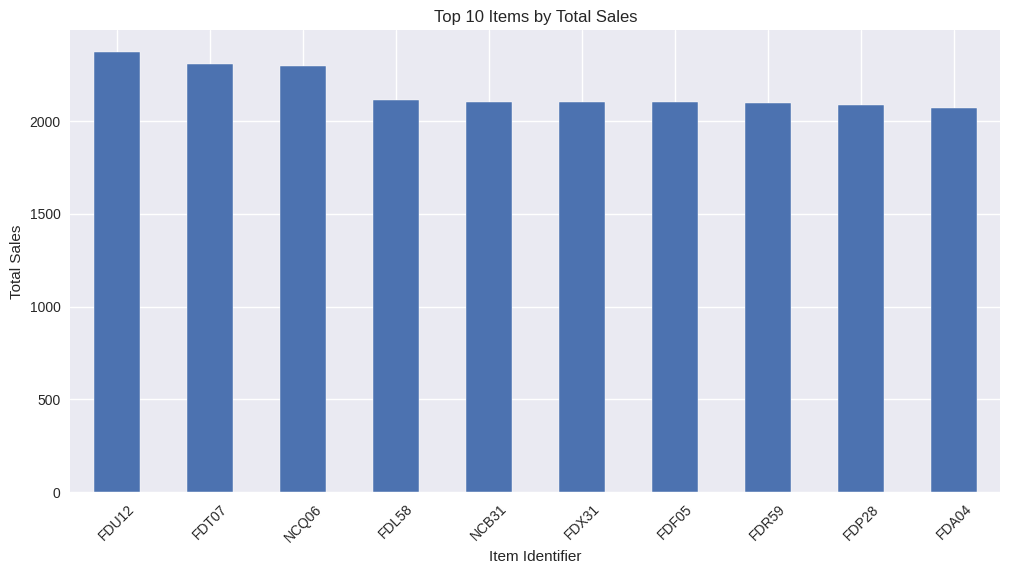

In [23]:
# Top 10 Items by Sales (assuming Item Identifier is unique-ish)
top_items = df.groupby('Item Identifier')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar')
plt.title('Top 10 Items by Total Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

#Outlet Performance Analysis

-------------

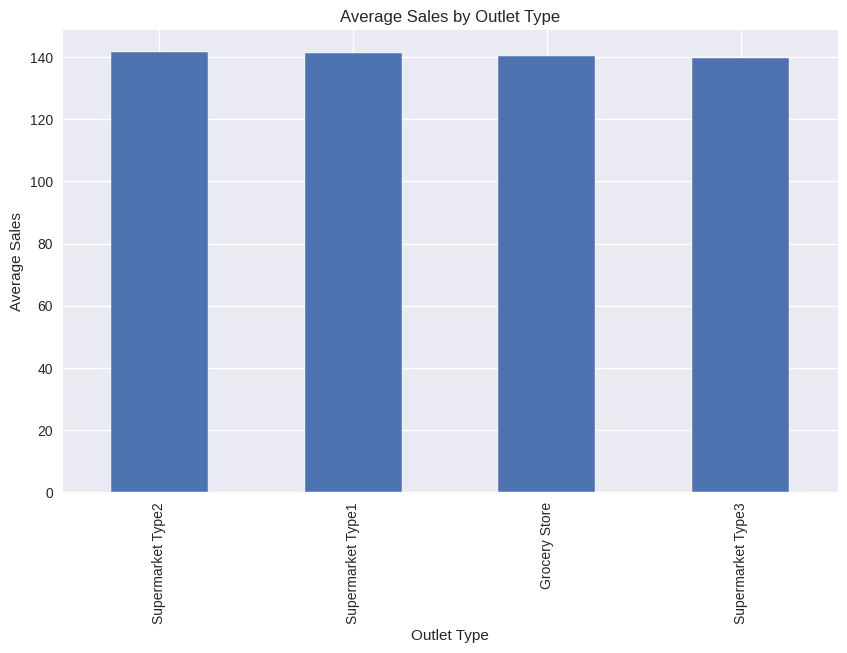

In [24]:
# Average Sales by Outlet Type
avg_sales_by_outlet_type = df.groupby('Outlet Type')['Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_sales_by_outlet_type.plot(kind='bar')
plt.title('Average Sales by Outlet Type')
plt.ylabel('Average Sales')
plt.show()

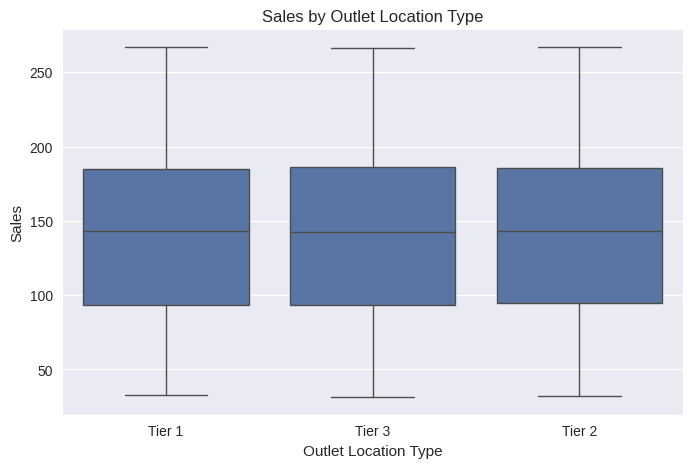

In [25]:
# Sales by Outlet Location Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outlet Location Type', y='Sales')
plt.title('Sales by Outlet Location Type')
plt.show()

In [26]:
# Outlet Performance: Sales vs. Outlet Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Outlet Age', y='Sales')
plt.title('Sales vs. Outlet Age')
plt.show()

ValueError: Could not interpret value `Outlet Age` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

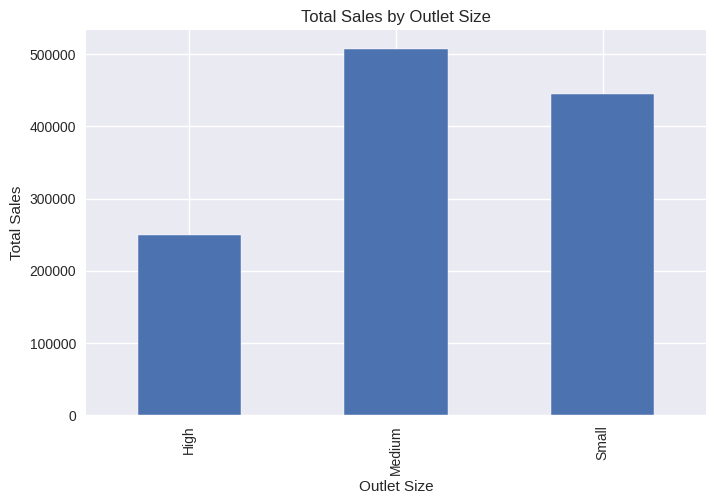

In [27]:
# Total Sales by Outlet Size
total_sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(8, 5))
total_sales_by_size.plot(kind='bar')
plt.title('Total Sales by Outlet Size')
plt.ylabel('Total Sales')
plt.show()

# Advanced Insights and Visualizations

--------------------

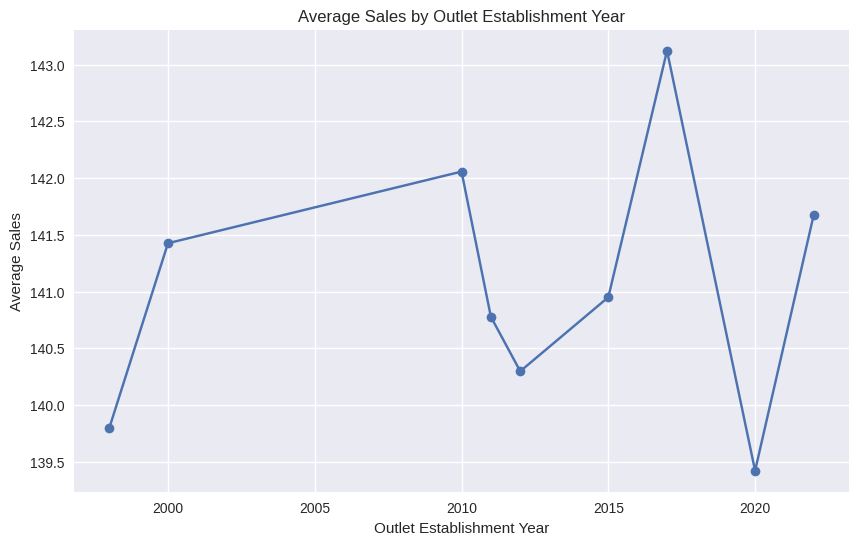

In [28]:
# Sales Trend by Outlet Establishment Year
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].mean()
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', marker='o')
plt.title('Average Sales by Outlet Establishment Year')
plt.ylabel('Average Sales')
plt.show()

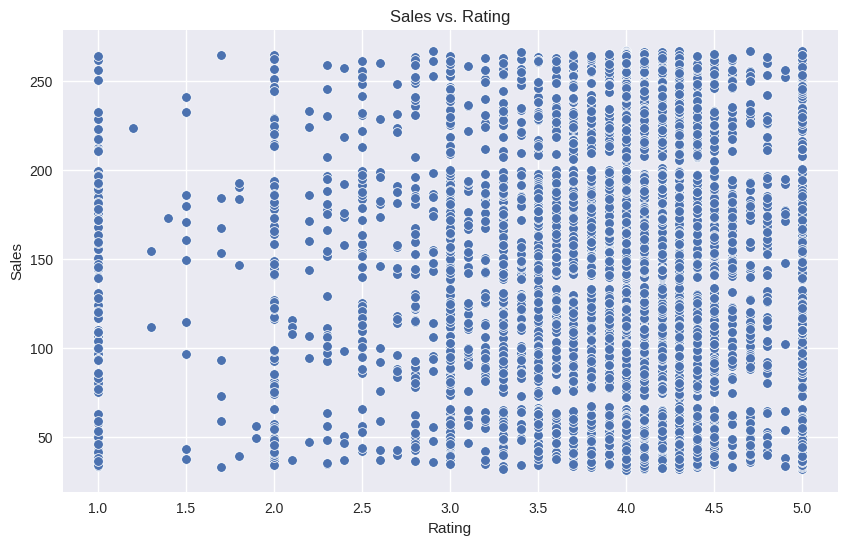

In [29]:
# Impact of Rating on Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Sales')
plt.title('Sales vs. Rating')
plt.show()

In [30]:
# Pairplot for Key Numerical Variables
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

KeyError: "['Outlet Age'] not in index"

# Business Intelligence Insights

----------------

In [31]:
# Summary of Key Findings
print("Key Insights from Blinkit Sales Analysis:")
print("1. Item Sales: Fruits and Vegetables have the highest average sales, indicating demand for fresh produce. Low Fat items dominate total sales (around 65%).")
print("2. Outlet Performance: Supermarket Type1 outlets perform best in average sales. Larger outlets (Medium/High) generate more total sales.")
print("3. Correlations: Sales positively correlate with Rating (0.02) and negatively with Item Visibility (-0.13), suggesting better visibility might not always boost sales—focus on placement.")
print("4. Trends: Newer outlets (lower age) show varied sales; older ones might need refreshes. Top items by sales can guide inventory stocking.")
print("5. Recommendations: Promote high-selling item types in underperforming outlets. Use ratings to improve customer satisfaction and indirectly boost sales.")


Key Insights from Blinkit Sales Analysis:
1. Item Sales: Fruits and Vegetables have the highest average sales, indicating demand for fresh produce. Low Fat items dominate total sales (around 65%).
2. Outlet Performance: Supermarket Type1 outlets perform best in average sales. Larger outlets (Medium/High) generate more total sales.
3. Correlations: Sales positively correlate with Rating (0.02) and negatively with Item Visibility (-0.13), suggesting better visibility might not always boost sales—focus on placement.
4. Trends: Newer outlets (lower age) show varied sales; older ones might need refreshes. Top items by sales can guide inventory stocking.
5. Recommendations: Promote high-selling item types in underperforming outlets. Use ratings to improve customer satisfaction and indirectly boost sales.


In [32]:
#  Export cleaned dataset for further use (optional)
df.to_csv('blinkit_sales_cleaned.csv', index=False)
print("\nCleaned dataset exported as 'blinkit_sales_cleaned.csv'")


Cleaned dataset exported as 'blinkit_sales_cleaned.csv'
